Note: figure S8 panels E and F are generated in the subsequent notebook (08)

In [1]:
suppressPackageStartupMessages({
    library(monocle)
    
    library(RColorBrewer)
    library(dplyr)
    library(ggplot2)
    library(pheatmap)
    library(reshape2)
})

Warning message:
“replacing previous import by ‘splines::splineDesign’ when loading ‘VGAM’”Warning message:
“replacing previous import by ‘grid::arrow’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘grid::unit’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘igraph::clusters’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘ggplot2::Position’ when loading ‘monocle’”

This analysis was made using Monocle version 2.3.5. The source code for Monocle 2.3.5 is available as a supplementary file to Cao et al. 2017 on the Science website. We are working on updating the analysis to the latest version of Monocle.

In [2]:
sessionInfo()

R version 3.2.1 (2015-06-18)
Platform: x86_64-unknown-linux-gnu (64-bit)
Running under: CentOS release 6.8 (Final)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.2      pheatmap_1.0.8      dplyr_0.7.1        
 [4] RColorBrewer_1.1-2  monocle_2.3.5       DDRTree_0.1.5      
 [7] irlba_2.2.1         VGAM_1.0-3          ggplot2_2.2.1      
[10] Biobase_2.30.0      BiocGenerics_0.16.1 Matrix_1.2-7.1     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11           bindr_0.1              plyr_1

In [3]:
load("RData/L2.experiment.1.no-cruft.RData")
load("RData/L2.experiment.2.no-cruft.RData")

In [4]:
pData(cds.experiment.2)$cluster.name = ifelse(
    pData(cds.experiment.2)$Cluster %in% c(1, 6),
    "Germline", pData(cds.experiment.2)$cluster.name)

In [5]:
sum(with(pData(cds.experiment.2), cluster.name != "Germline"))

[1] 6335

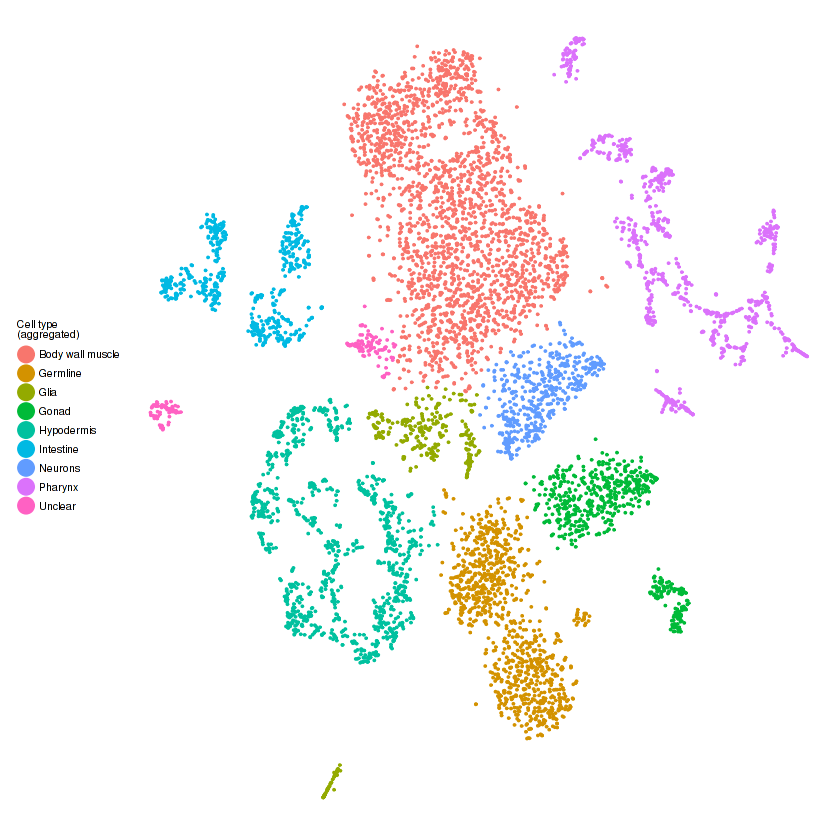

In [6]:
plot = ggplot(pData(cds.experiment.2), aes(x = tsne_1, y = tsne_2, color = cluster.name)) +
    geom_point(size = 0.004) +
    xlab("") + ylab("") +
    guides(color = guide_legend(
        title = "Cell type\n(aggregated)",
        override.aes = list(size = 4))) +
    theme_void() +
    monocle:::monocle_theme_opts() +
    theme(legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.margin = margin(0, -10, 0, 10),
          legend.key.width=unit(0.15, "in"),
          legend.key.height=unit(0.15, "in"),
          legend.position = "left")

show(plot)

ggsave("plots/Fig_S9a.pdf", plot = plot,
    device = cairo_pdf, units="in", width = 3.0, height = 4.0)

In [7]:
cds.hyp.1 = cds.experiment.1[, with(pData(cds.experiment.1), !is.na(tissue) & tissue == "Hypodermis")]
cds.hyp.1@reducedDimA = cds.hyp.1@reducedDimA[,
    with(pData(cds.experiment.1), !is.na(tissue) & tissue == "Hypodermis")]

In [8]:
cds.hyp.2 = cds.experiment.2[, with(pData(cds.experiment.2), !is.na(tissue) & tissue == "Hypodermis")]
cds.hyp.2@reducedDimA = cds.hyp.2@reducedDimA[,
    with(pData(cds.experiment.2), !is.na(tissue) & tissue == "Hypodermis")]

In [9]:
pData(cds.hyp.1)$experiment = "Experiment 1"
pData(cds.hyp.2)$experiment = "Experiment 2"

In [10]:
cds.hyp = newCellDataSet(
    cbind(exprs(cds.hyp.1), exprs(cds.hyp.2)),
    phenoData = new("AnnotatedDataFrame", data = rbind(
        pData(cds.hyp.1)[, c("cell", "n.umi", "tissue", "cell.type", "experiment", "tsne_1", "tsne_2")],
        pData(cds.hyp.2)[, c("cell", "n.umi", "tissue", "cell.type", "experiment", "tsne_1", "tsne_2")] )),
    featureData = new("AnnotatedDataFrame", data = fData(cds.hyp.1)),
    expressionFamily = negbinomial.size())

In [11]:
pData(cds.hyp)$expr.mlt.11 = expresses.gene(cds.hyp, "mlt-11")
pData(cds.hyp)$expr.qua.1 = expresses.gene(cds.hyp, "qua-1")
pData(cds.hyp)$expr.sqt.1 = expresses.gene(cds.hyp, "sqt-1")
pData(cds.hyp)$expr.dpy.5 = expresses.gene(cds.hyp, "dpy-5")
pData(cds.hyp)$expr.col.12 = expresses.gene(cds.hyp, "col-12")
pData(cds.hyp)$expr.col.103 = expresses.gene(cds.hyp, "col-103")
pData(cds.hyp)$expr.mup.4 = expresses.gene(cds.hyp, "mup-4")

In [12]:
pData(cds.hyp)$plot.group = with(pData(cds.hyp), ifelse(
    expr.sqt.1 & expr.dpy.5, "dpy-5 and sqt-1", ifelse(
    expr.col.12 & expr.dpy.5, "dpy-5 and col-12", ifelse(
    expr.sqt.1, "sqt-1", ifelse(
    expr.col.12, "col-12", ifelse(
    expr.dpy.5, "dpy-5", "None"))))))

pData(cds.hyp)$plot.group = factor(pData(cds.hyp)$plot.group, levels = c(
    "dpy-5 and sqt-1", "sqt-1", "dpy-5", "dpy-5 and col-12", "col-12", "None"))

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

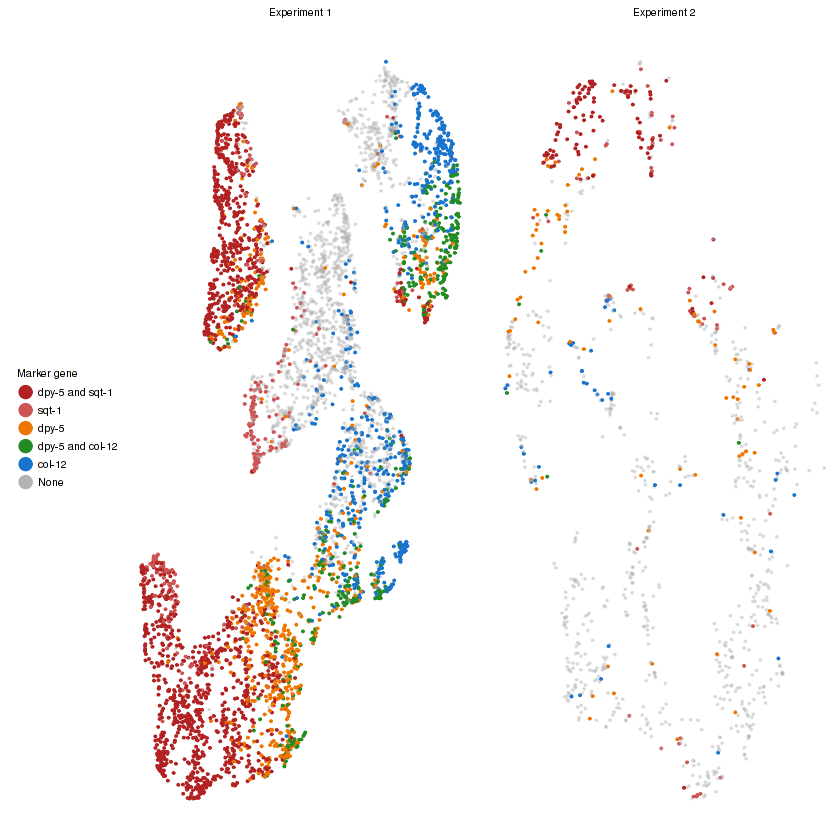

In [13]:
plot = ggplot(pData(cds.hyp), aes(x = tsne_1, y = tsne_2, color = plot.group, alpha = plot.group)) +
    facet_wrap(~ experiment, ncol = 2, scales = "free") +
    geom_point(size = 0.04) +
    scale_color_manual(values =
        c("firebrick", "indianred3", "darkorange2", "forestgreen", "dodgerblue3", "grey70")) +
    scale_alpha_manual(values = c(1, 1, 1, 1, 1, 1.0/3.0)) +
    guides(color = guide_legend(title = "Marker gene", override.aes = list(size = 3)), alpha = F) +
    theme_void(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        legend.position = "left",
        strip.text = element_text(size = 6),
        legend.title = element_text(size = 6),
        legend.text = element_text(size = 6),
        legend.margin = margin(0, -10, 0, 10),
        legend.key.width = unit(0.15, "in"),
        legend.key.height = unit(0.15, "in"))

show(plot)

ggsave("plots/Fig_S9b.pdf", plot = plot,
    device = cairo_pdf, units = "in", width = 3.5, height = 1.5)

In [14]:
pData(cds.hyp)$plot.group = with(pData(cds.hyp), ifelse(
    expr.col.103 & (expr.mlt.11 | expr.qua.1), "col-103 and\nmlt-11 or qua-1", ifelse(
    expr.col.103, "col-103", ifelse(
    expr.mlt.11 | expr.qua.1, "mlt-11 or qua-1", "None"))))

pData(cds.hyp)$plot.group = factor(pData(cds.hyp)$plot.group, levels = c(
    "col-103 and\nmlt-11 or qua-1", "col-103", "mlt-11 or qua-1", "None"))

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

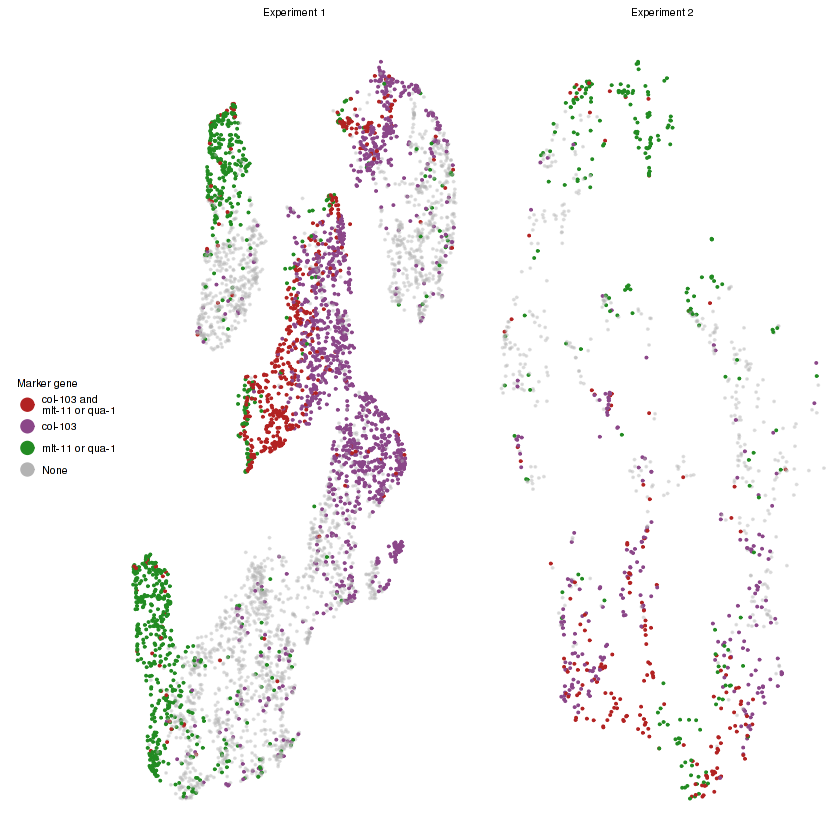

In [15]:
plot = ggplot(pData(cds.hyp), aes(x = tsne_1, y = tsne_2, color = plot.group, alpha = plot.group)) +
    facet_wrap(~ experiment, ncol = 2, scales = "free") +
    geom_point(size = 0.04) +
    scale_color_manual(values =
        c("firebrick", "orchid4", "forestgreen", "grey70")) +
    scale_alpha_manual(values = c(1, 1, 1, 1.0/3.0)) +
    guides(color = guide_legend(title = "Marker gene", override.aes = list(size = 3)), alpha = F) +
    theme_void(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        legend.position = "left",
        strip.text = element_text(size = 6),
        legend.title = element_text(size = 6),
        legend.text = element_text(size = 6),
        legend.margin = margin(0, -10, 0, 10),
        legend.key.width = unit(0.18, "in"),
        legend.key.height = unit(0.18, "in"))

show(plot)

ggsave("plots/Fig_S9c.pdf", plot = plot,
    device = cairo_pdf, units = "in", width = 3.5, height = 1.5)

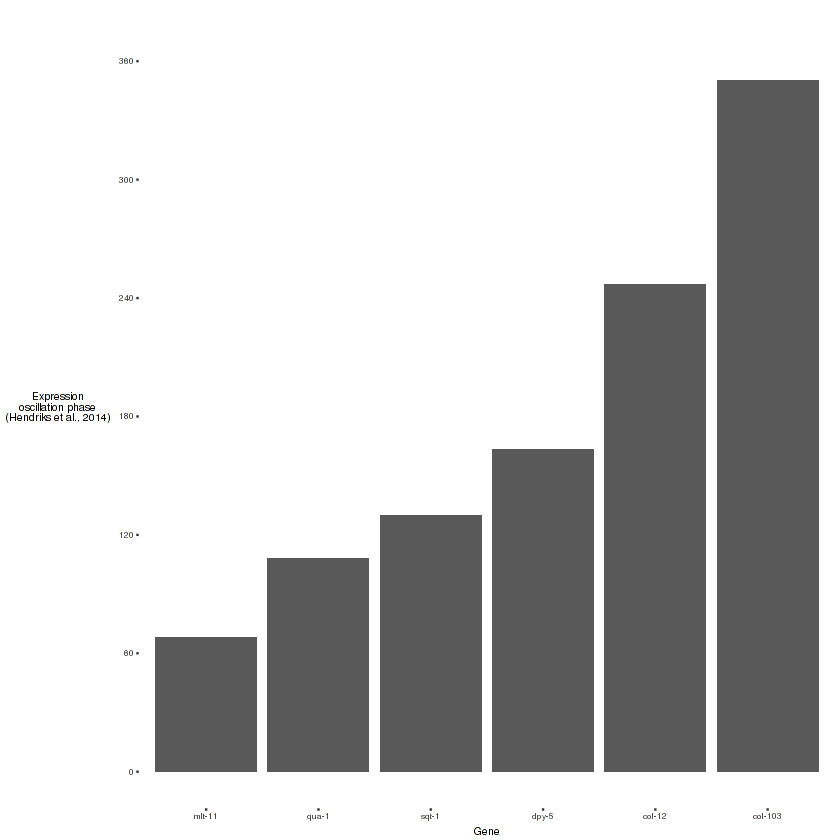

In [16]:
df = data.frame(
    gene = c("mlt-11", "qua-1", "sqt-1", "dpy-5", "col-12", "col-103"),
    phase = c(67.99, 108.12, 130.07, 163.5, 246.67, 350.25))

df$gene = factor(df$gene, levels = df$gene)

plot = ggplot(df, aes(x = gene, y = phase)) +
    geom_bar(stat = "identity") +
    xlab("Gene") +
    ylab("Expression\noscillation phase\n(Hendriks et al., 2014)") +
    scale_y_continuous(limits = c(0, 370), breaks = seq(0, 370, 60)) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        axis.title.x = element_text(margin = margin(5, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 5, 0, 0), angle = 0, vjust = 0.5))

show(plot)

ggsave("plots/Fig_S9d.pdf", plot = plot,
    device = cairo_pdf, units = "in", width = 2.8, height = 1.0)